### - Exercici 1
#### Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import shapiro

In [3]:
columnes=["Tipus","Alcohol", "Malic acid", "Ash","Alcalinity of ash", "Magnesium","Total phenols", "Flavanoids", "Nonflavanoid phenols","Proanthocyanins", "Color intensity",
 "Hue","OD280/OD315 of diluted wines","Proline"]    
wine= pd.read_csv ("/Users/esthersanroma/Desktop/DATA SCIENCES/wineData.txt",sep=',', names =columnes, encoding="latin-1",header=None)
wine


,Tipus,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.shape

(178, 14)

In [5]:
wine.columns

Index(['Tipus', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

Aquestes dades són els resultats d'una anàlisi química de vins cultivats a la mateixa regió a Itàlia però derivats de tres conreus diferents.
L'anàlisi va determinar les quantitats de 13 components que es troben en cadascun dels tres tipus de vins.
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline            


In [6]:
wine.isnull().sum()

Tipus                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
wine.isna().sum()

Tipus                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
wine.describe()

,Tipus,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tipus                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

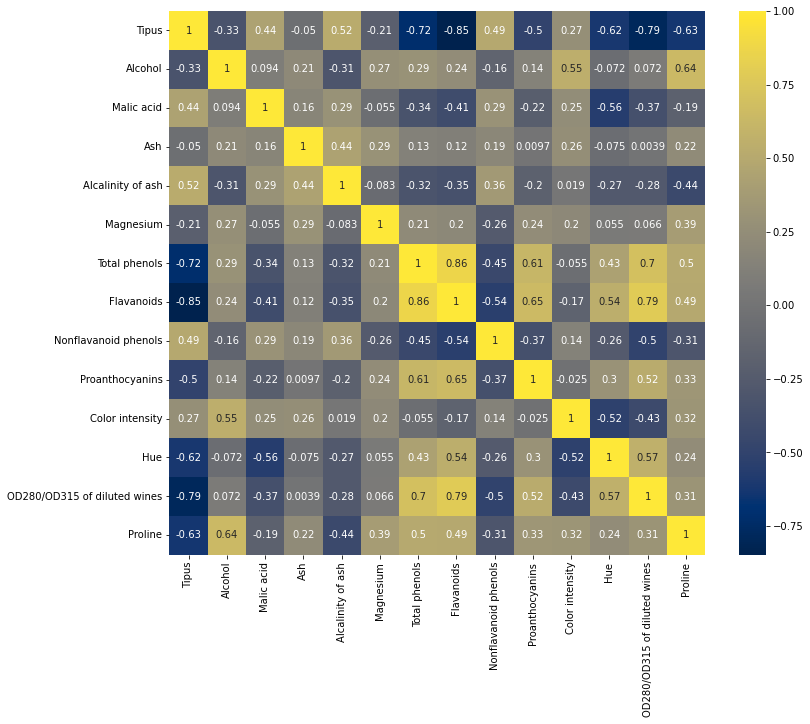

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(wine.corr(),cmap="cividis", annot=True);

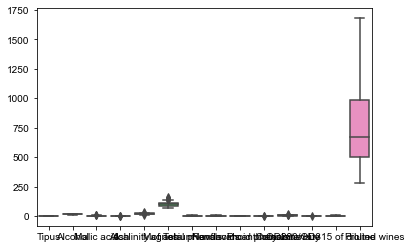

In [11]:
sns.boxplot(data=wine)
sns.set(rc = {'figure.figsize':(20,30)})

<Figure size 1440x2160 with 0 Axes>

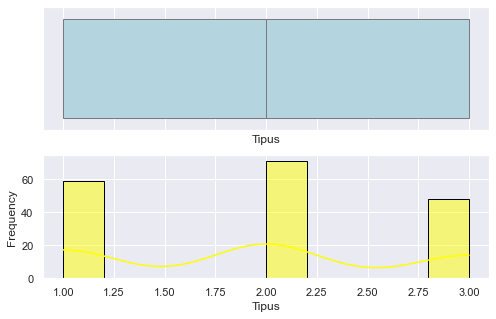

<Figure size 576x360 with 0 Axes>

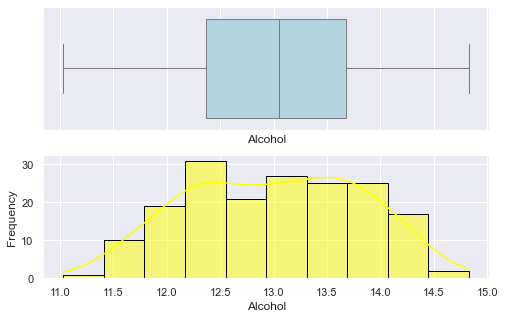

<Figure size 576x360 with 0 Axes>

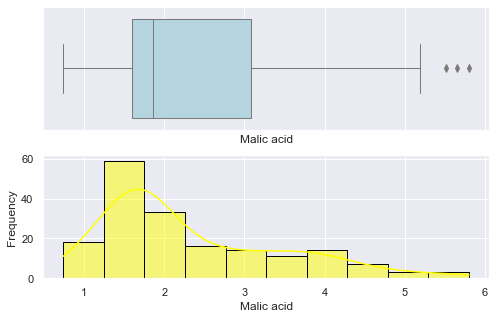

<Figure size 576x360 with 0 Axes>

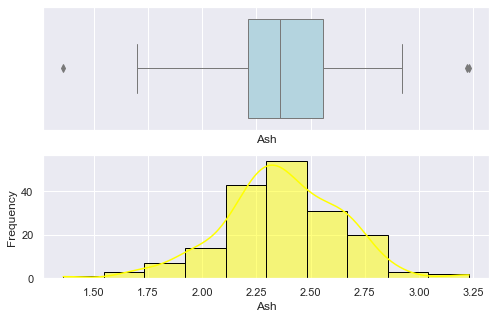

<Figure size 576x360 with 0 Axes>

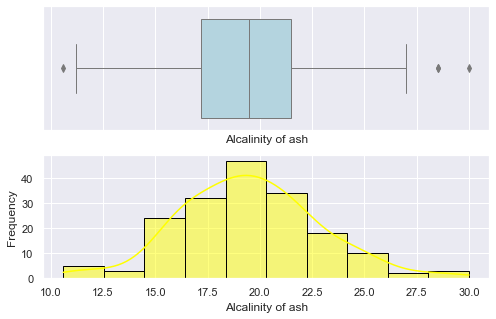

<Figure size 576x360 with 0 Axes>

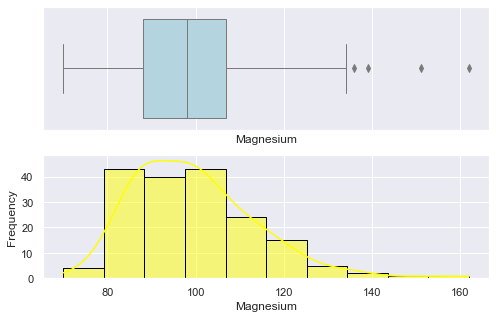

<Figure size 576x360 with 0 Axes>

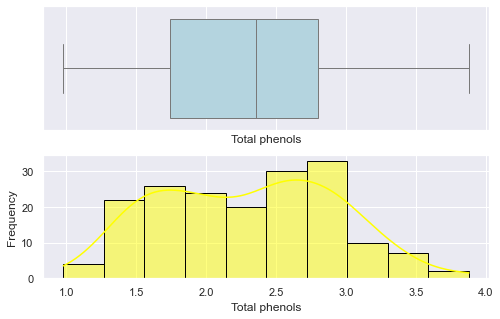

<Figure size 576x360 with 0 Axes>

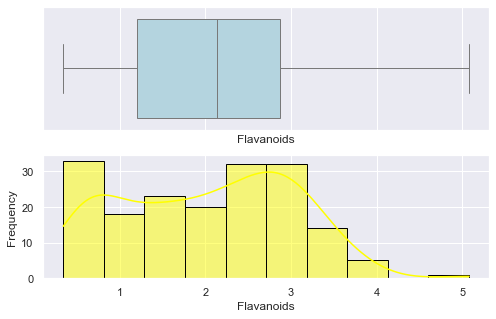

<Figure size 576x360 with 0 Axes>

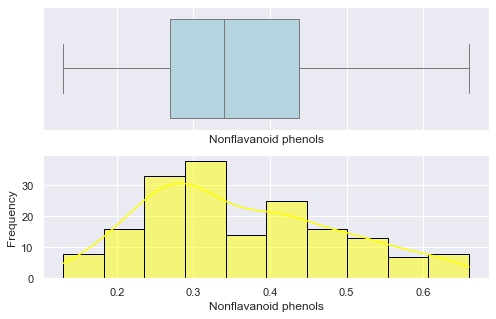

<Figure size 576x360 with 0 Axes>

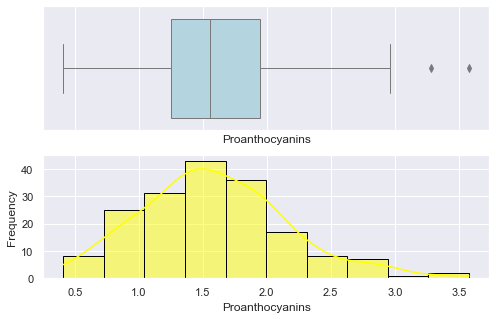

<Figure size 576x360 with 0 Axes>

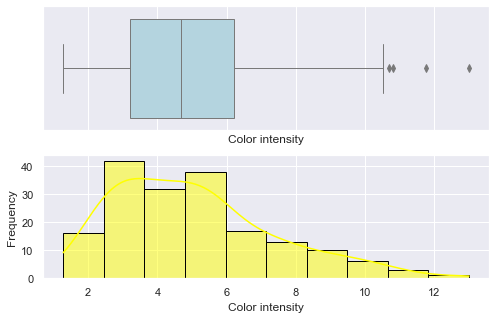

<Figure size 576x360 with 0 Axes>

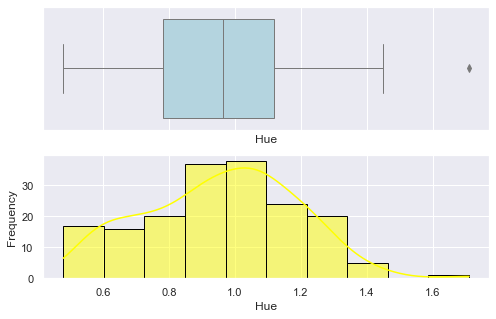

<Figure size 576x360 with 0 Axes>

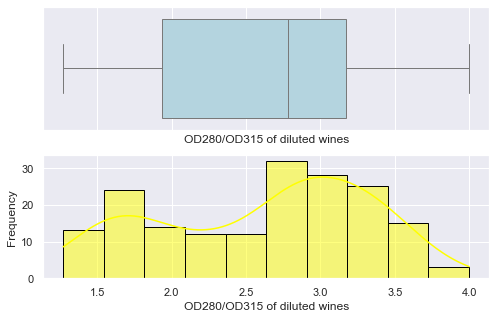

<Figure size 576x360 with 0 Axes>

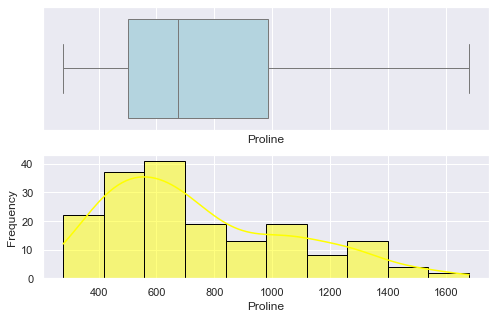

In [12]:
for i in wine.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8,5)})
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True)
    plt.gca().set(xlabel=i,ylabel="Frequency")
    sns.boxplot(wine[i], ax=ax_box, linewidth=1.0, color="lightblue")
    sns.histplot(wine[i],ax=ax_hist, bins=10, kde=True, color="yellow", edgecolor="black")

Observem, outliers Malic acid, Ash, Alcanity of ash, Magnesium,Proanthocyanins,Color intensity, Hue.
Comprovem si es gaussiana o no.

In [13]:
for columns in wine:
  stat, p = shapiro(wine[columns])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print(' SI Gaussià,'+ columns)
  else:
	  print(' NO Gaussià,' + columns)
     

stat=0.804, p=0.000
 NO Gaussià,Tipus
stat=0.982, p=0.020
 NO Gaussià,Alcohol
stat=0.889, p=0.000
 NO Gaussià,Malic acid
stat=0.984, p=0.039
 NO Gaussià,Ash
stat=0.990, p=0.264
 SI Gaussià,Alcalinity of ash
stat=0.938, p=0.000
 NO Gaussià,Magnesium
stat=0.977, p=0.004
 NO Gaussià,Total phenols
stat=0.955, p=0.000
 NO Gaussià,Flavanoids
stat=0.963, p=0.000
 NO Gaussià,Nonflavanoid phenols
stat=0.981, p=0.014
 NO Gaussià,Proanthocyanins
stat=0.940, p=0.000
 NO Gaussià,Color intensity
stat=0.981, p=0.017
 NO Gaussià,Hue
stat=0.945, p=0.000
 NO Gaussià,OD280/OD315 of diluted wines
stat=0.931, p=0.000
 NO Gaussià,Proline


Fem Processat de dades, 
Standarscaler,
SI Gaussià,Alcalinity of ash.
Minmaxscaler,
No normal: Tipus, Alcohol,Total phenols, Flavanoids, Nonflavanoid phenols,OD280/OD315 of diluted wines, Proline.
Robustscaler
Outliers: Malic acid, Ash, Magnesium,Proanthocyanins,Color intensity, Hue.
Dos models de classificació: K-Nearest Neighbors (KNN) i Support Vector Machines (SVM).

In [14]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

In [15]:
wine01=wine.copy()

In [16]:
columnes_Sc = ["Alcalinity of ash"]
columnes_Rb = ["Malic acid", "Ash", "Magnesium","Proanthocyanins","Color intensity","Hue"]
columnes_mM = ["Alcohol","Total phenols", "Flavanoids", "Nonflavanoid phenols","OD280/OD315 of diluted wines", "Proline"]

standard_scaler = preprocessing.StandardScaler().fit(wine01[columnes_Sc])
wine01[columnes_Sc] = standard_scaler .transform(wine01[columnes_Sc])

scalerRobust= preprocessing.RobustScaler().fit(wine01[columnes_Rb])
wine01[columnes_Rb] = scalerRobust.transform(wine01[columnes_Rb])

scalerNorm= preprocessing.MinMaxScaler().fit(wine01[columnes_mM])
wine01[columnes_mM]= scalerNorm.transform(wine01[columnes_mM])
wine01.head()

,Tipus,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963


<Figure size 576x360 with 0 Axes>

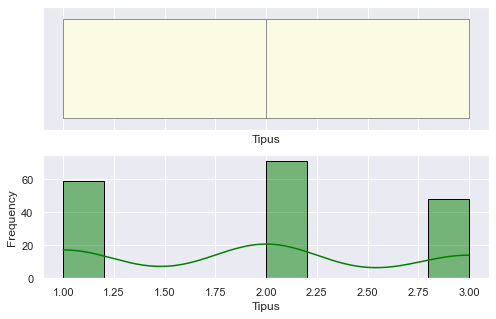

<Figure size 576x360 with 0 Axes>

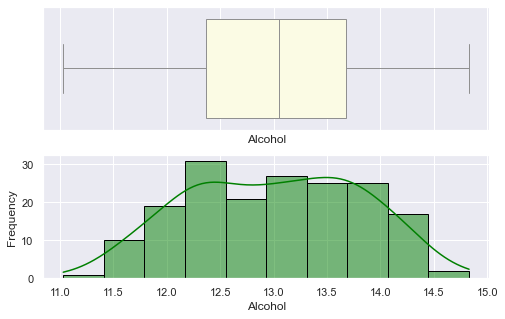

<Figure size 576x360 with 0 Axes>

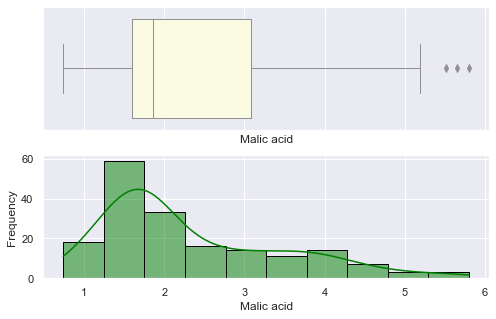

<Figure size 576x360 with 0 Axes>

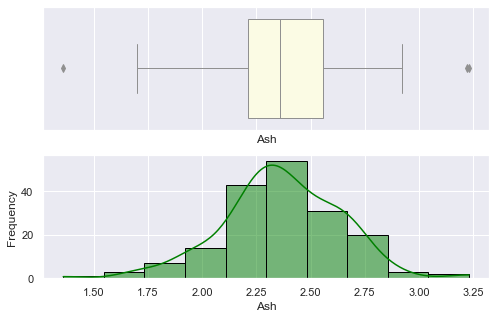

<Figure size 576x360 with 0 Axes>

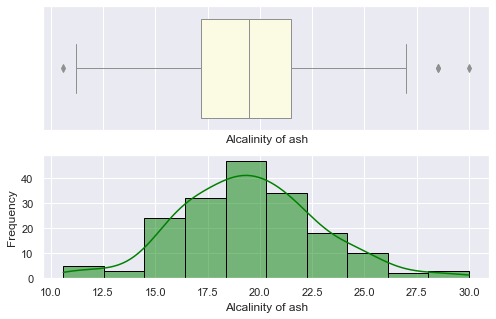

<Figure size 576x360 with 0 Axes>

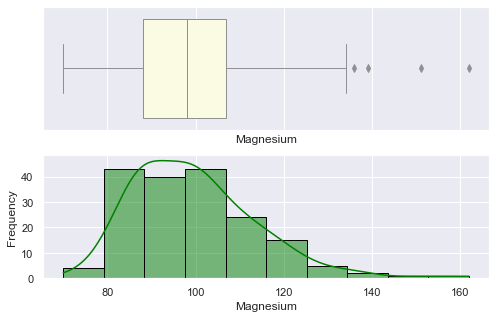

<Figure size 576x360 with 0 Axes>

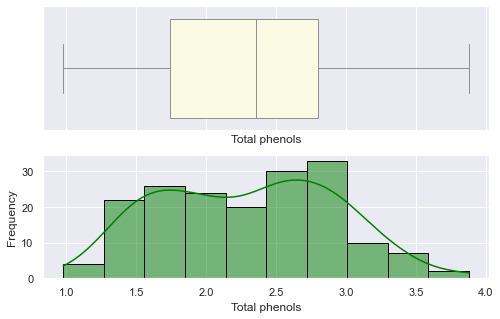

<Figure size 576x360 with 0 Axes>

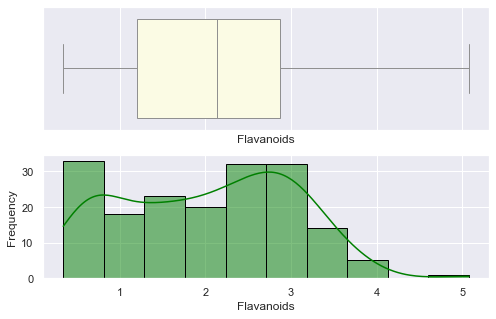

<Figure size 576x360 with 0 Axes>

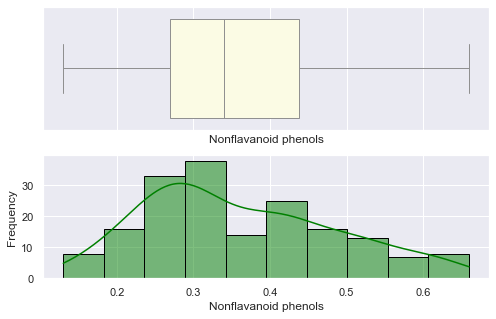

<Figure size 576x360 with 0 Axes>

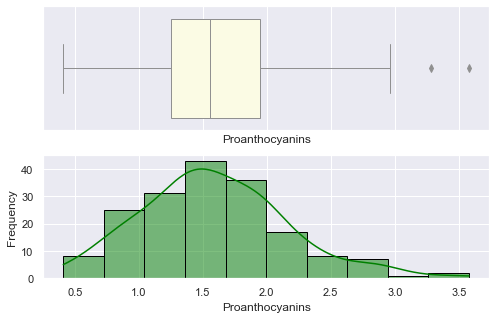

<Figure size 576x360 with 0 Axes>

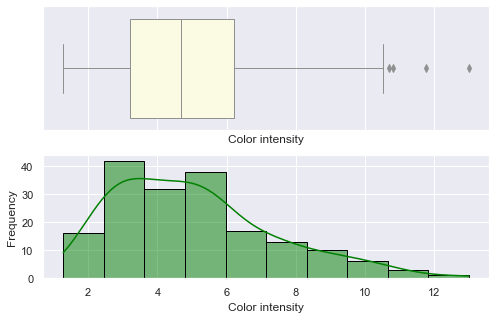

<Figure size 576x360 with 0 Axes>

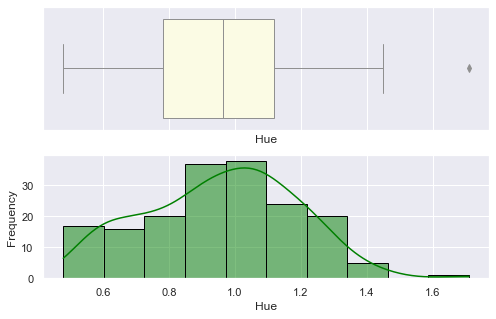

<Figure size 576x360 with 0 Axes>

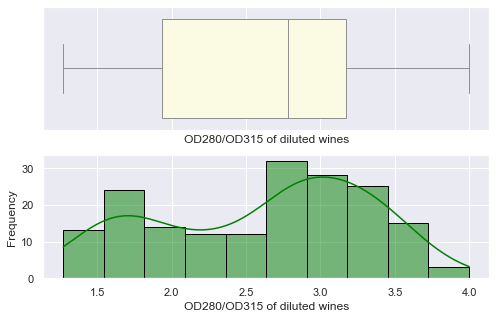

<Figure size 576x360 with 0 Axes>

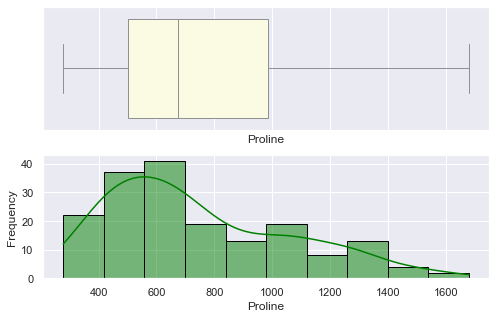

In [17]:
for i in wine01.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8,5)})
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True)
    plt.gca().set(xlabel=i,ylabel="Frequency")
    sns.boxplot(wine[i], ax=ax_box, linewidth=1.0, color="lightyellow")
    sns.histplot(wine[i],ax=ax_hist, bins=10, kde=True, color="green", edgecolor="black")

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X= wine01.drop(["Tipus"], axis=1)
y = wine01["Tipus"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


In [21]:
X_train.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000
mean,0.512917,0.343595,0.002432,-0.006518,0.128614,0.451408,0.350657,0.449110,7.575453e-02,0.123358,-0.025540,0.484548,0.325888
std,0.215820,0.772928,0.803504,1.037422,0.771094,0.219902,0.211850,0.242016,8.337942e-01,0.782187,0.693632,0.264520,0.215637
min,0.000000,-0.658784,-2.877698,-2.671018,-1.473684,0.000000,0.000000,0.000000,-1.621429e+00,-0.989933,-1.437037,0.000000,0.000000
25%,0.342763,-0.168919,-0.431655,-0.689137,-0.513158,0.256897,0.165612,0.264151,-4.357143e-01,-0.493289,-0.540741,0.207875,0.160128
50%,0.521053,0.006757,0.000000,-0.088567,0.000000,0.458621,0.366034,0.396226,-1.587272e-16,-0.030201,0.000000,0.551282,0.272468
75%,0.696711,0.858108,0.517986,0.602088,0.473684,0.627586,0.527954,0.641509,5.892857e-01,0.480705,0.459259,0.695971,0.467011
max,1.000000,2.658784,2.503597,3.154511,3.368421,1.000000,1.000000,1.000000,2.892857e+00,2.788591,2.207407,1.000000,0.905136


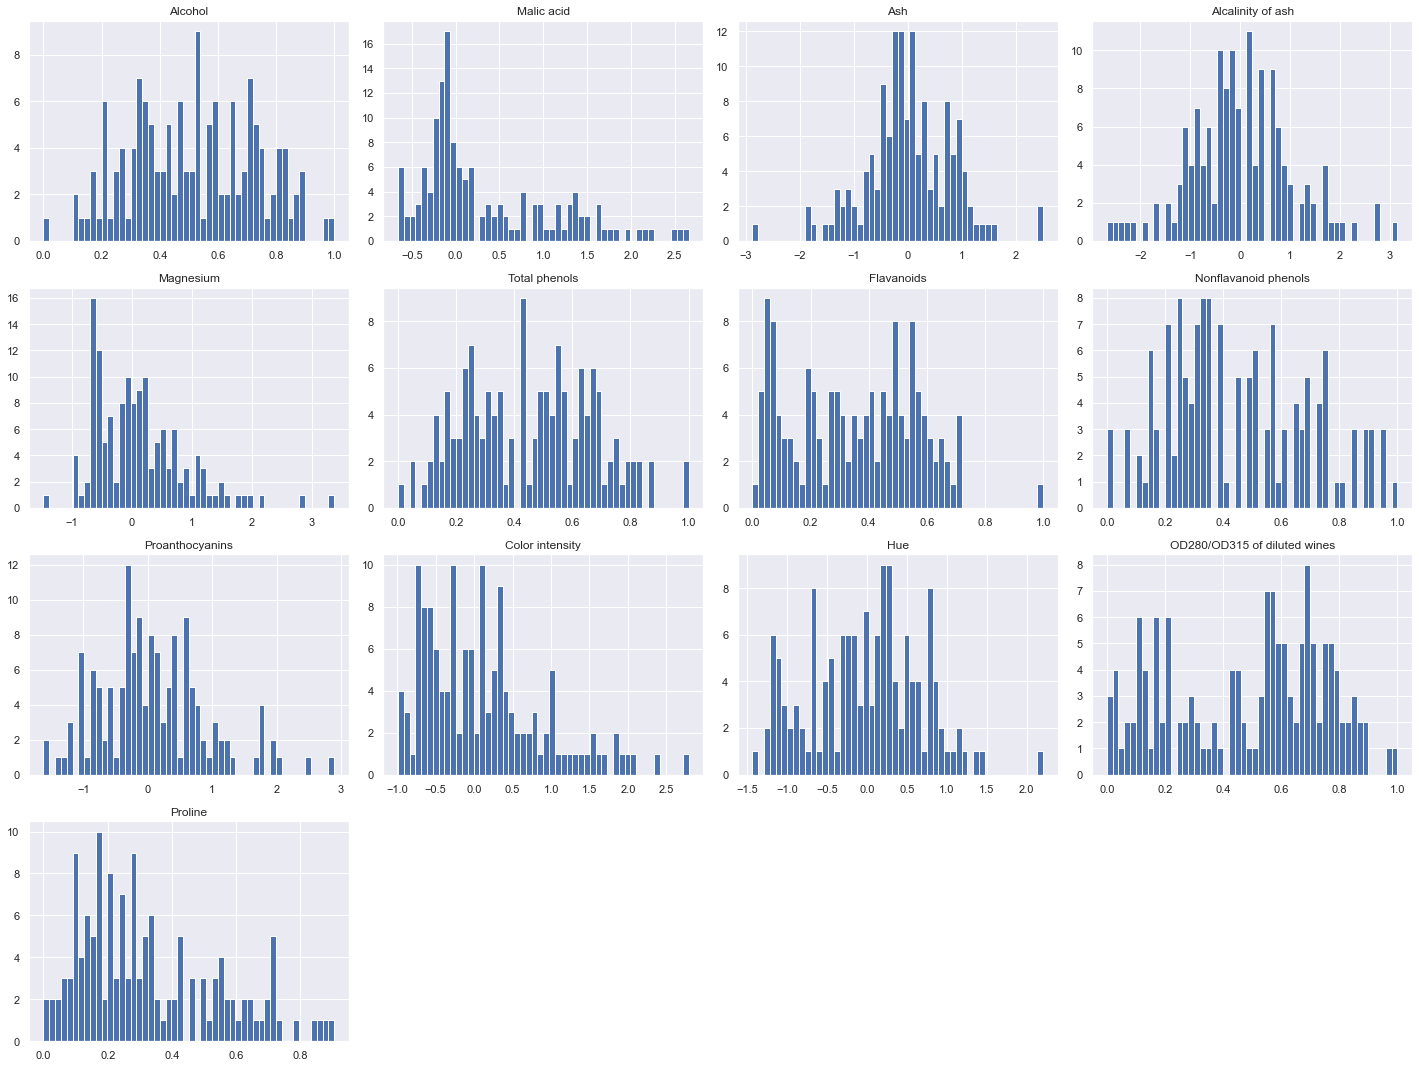

In [22]:
X_train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

K-Nearest Neighbors (KNN)
És un mètode que simplement cerca en les observacions més properes a la que s'està tractant de determinar i classificar el punt d'interès basat en la majoria de dades que li envolten. 
Supervisat i Basat en Instancia.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import itertools

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_Knn = knn.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_Knn))
print(classification_report(y_test, y_pred_Knn))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.86
[[12  1  1]
 [ 2 11  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.79      0.85        14
           3       0.80      1.00      0.89         8

    accuracy                           0.86        36
   macro avg       0.86      0.88      0.86        36
weighted avg       0.87      0.86      0.86        36



Veiem que la precisió que ens dóna és de 96% al set d'entrenament i del 86% per al de test. Confirmem la precisió veient la Confusió Matrix i el Report sobre el conjunt de tests, que ens detalla els encerts i fallades. la puntuació F1 és del 86%, força bona.

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:>>

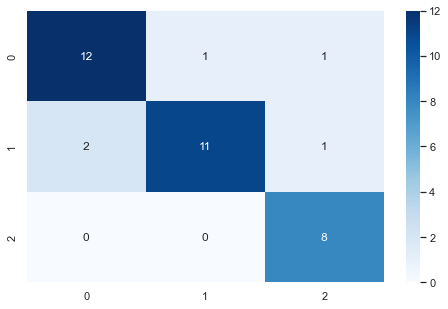

In [26]:
cm =confusion_matrix(y_test, y_pred_Knn)
sns.heatmap(cm, annot=True, cmap = "Blues").set

Aquest codi crea un gràfic de calor que representa la matriu de confusió. El color blau més fosc indica una major quantitat de prediccions correctes, mentre que el color blau més clar indica una menor quantitat. Les etiquetes en els eixos mostren les classes veritables i les prediccions, i els valors a les cel·les indiquen el nombre de prediccions correctes i incorrectes per a cada classe.

Support Vector Machines (SVM)

Support Vector Machines (SVM) és un algorisme de classificació basat en el concepte de separació de les dades en classes per mitjà d'un hiperpla. L'objectiu de SVM és trobar el millor hiperpla que separa les dades en classes de manera òptima, és a dir, que les dades d'entrenament estiguin el més allunyades possible entre elles i el més a prop possible del hiperpla que les separa.

In [27]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [28]:
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred_SVM = clf.predict(X_test)

print('Accuracy of SVM classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.94
[[13  1  0]
 [ 1 13  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



El resultat mostra que l'accuracy de la classificació de l'entrenament és del 99% i de la prova és del 94%. La matriu de confusió indica que hi ha 13 prediccions correctes per a la classe 1, 13 prediccions correctes per a la classe 2 i 8 prediccions correctes per a la classe 3. La sortida també proporciona informació sobre la precisió, la recall i el punt F1 per a cada classe, així com les dades de suport.

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:>>

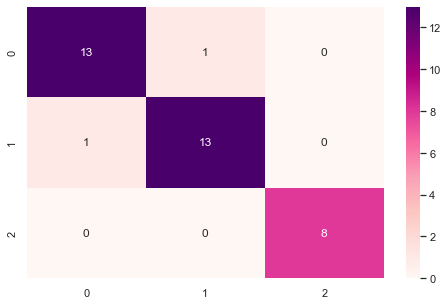

In [29]:
CM =confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(CM, annot=True, cmap = "RdPu").set

### - Exercici 2
#### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

In [30]:
from sklearn.metrics import f1_score

In [31]:
CMKNN=confusion_matrix(y_test, y_pred_Knn)
CMSVM=confusion_matrix(y_test, y_pred_SVM)
acc_KNN = knn.score(X_test, y_test)
acc_SVM = clf.score(X_test, y_test)
acc_KNN = "{:.2f}".format(acc_KNN)
acc_SVM = "{:.2f}".format(acc_SVM)
F1_KNN= f1_score(y_test, y_pred_Knn, average="macro")
F1_SVM= f1_score(y_test, y_pred_SVM, average="macro")

In [32]:
metrics = {'Model': ['KNN', 'SVM'],
           'Accuracy': [acc_KNN, acc_SVM],"F1":[F1_KNN, F1_SVM],
           'Confusion Matrix': [CMKNN, CMSVM]}

metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,F1,Confusion Matrix
0,KNN,0.86,0.864062,"[[12, 1, 1], [2, 11, 1], [0, 0, 8]]"
1,SVM,0.94,0.952381,"[[13, 1, 0], [1, 13, 0], [0, 0, 8]]"


A partir dels resultats obtinguts, podem veure que el model de SVM té una precisió millor (0.94) en comparació amb el model de KNN (0.86). Això significa que el model SVM és més precís en la predicció de les dades. Això es pot veure també en la matriu de confusió on es veu que el model SVM té més valors en la diagonal (representant les prediccions correctes) en comparació amb el model de KNN.

### - Exercici 3
#### Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Busco el millor valor k per a n_neighbors

In [33]:
k_range = list(range(1, 30))

# Definir els paràmetres a avaluar en el GridSearchCV
param_grid = dict(n_neighbors=k_range)

# Inicialitzar el GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Entrenar el model
grid.fit(X_train, y_train)

# Imprimir el millor valor de k
print("Best value of k: ", grid.best_params_)

# Imprimir la precisió mitjana en el conjunt de prova
print("Mean accuracy on test set: ", grid.best_score_)

Best value of k:  {'n_neighbors': 20}
Mean accuracy on test set:  0.9233333333333335


In [34]:
knn2 = KNeighborsClassifier(n_neighbors=20)
knn2.fit(X_train, y_train)
y_pred_Knn2 = knn2.predict(X_test)
print('Accuracy of K-NN2 classifier on training set: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy of K-NN2 classifier on test set: {:.2f}'
     .format(knn2.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_Knn2))
print(classification_report(y_test, y_pred_Knn2))

Accuracy of K-NN2 classifier on training set: 0.93
Accuracy of K-NN2 classifier on test set: 0.89
[[12  1  1]
 [ 2 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.92      0.86      0.89        14
           3       0.89      1.00      0.94         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.90        36
weighted avg       0.89      0.89      0.89        36



In [35]:
acc_KNN2 = knn2.score(X_test, y_test)
acc_KNN2 = "{:.2f}".format(acc_KNN2)
F1_KNN2= f1_score(y_test, y_pred_Knn2, average="macro")
CMKNN2=confusion_matrix(y_test, y_pred_Knn2)
metrics2 = {'Model': ['KNN', 'KNN2'],
           'Accuracy': [acc_KNN, acc_KNN2],"F1":[F1_KNN, F1_KNN2],
           'Confusion Matrix': [CMKNN, CMKNN2]}

metrics_df2 = pd.DataFrame(metrics2)
metrics_df2

,Model,Accuracy,F1,Confusion Matrix
0,KNN,0.86,0.864062,"[[12, 1, 1], [2, 11, 1], [0, 0, 8]]"
1,KNN2,0.89,0.895736,"[[12, 1, 1], [2, 12, 0], [0, 0, 8]]"


A partir d'aquesta taula, es pot veure que el model KNN2 té una precisió i un F1 una mica millors que el model KNN original. Això suggereix que el millor valor de k per a n_neighbors ha ajudat a millorar les prestacions del model.

Provem diferents per al parametre C

In [36]:
# Definir els paràmetres que es volen provar
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Crear un classificador de suport vectorial
svc = SVC()

# Crear una grid search
grid = GridSearchCV(svc, param_grid, cv=5)

# Entrenar el model
grid.fit(X_train, y_train)

# Mostrar el millor valor de C i gamma
print('Best value of C: ', grid.best_params_['C'])
print('Best value of gamma: ', grid.best_params_['gamma'])

# Mostrar la precisió en el conjunt de prova
print('Mean accuracy on test set: ', grid.score(X_test, y_test))

Best value of C:  100
Best value of gamma:  0.001
Mean accuracy on test set:  0.9722222222222222


In [37]:
clf2 = svm.SVC(gamma=0.001, C=100)
clf2.fit(X_train, y_train)
y_pred_SVM2 = clf2.predict(X_test)

print('Accuracy of SVM classifier on training set: {:.2f}'.format(clf2.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred_SVM2))
print(classification_report(y_test, y_pred_SVM2))

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.97
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.93      0.96        14
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [73]:
acc_SVM2 = clf2.score(X_test, y_test)
acc_SVM2 = "{:.2f}".format(acc_SVM2)
F1_SVM2= f1_score(y_test, y_pred_SVM2, average="macro")
CMSVM2=confusion_matrix(y_test, y_pred_SVM2)
metricsSVM = {'Model': ['SVM', 'SVM2'],
           'Accuracy': [acc_SVM, acc_SVM2],"F1":[F1_SVM, F1_SVM2],
           'Confusion Matrix': [CMSVM, CMSVM2]}

metrics_df3 = pd.DataFrame(metricsSVM)
metrics_df3

,Model,Accuracy,F1,Confusion Matrix
0,SVM,0.94,0.952381,"[[13, 1, 0], [1, 13, 0], [0, 0, 8]]"
1,SVM2,0.97,0.968046,"[[14, 0, 0], [0, 13, 1], [0, 0, 8]]"


Observem que el model SVM2 té una precisió i un F1 millors que el model SVM original. Això suggereix que els ajustos o les optimitzacions realitzats en SVM2 han ajudat a millorar les prestacions del model.

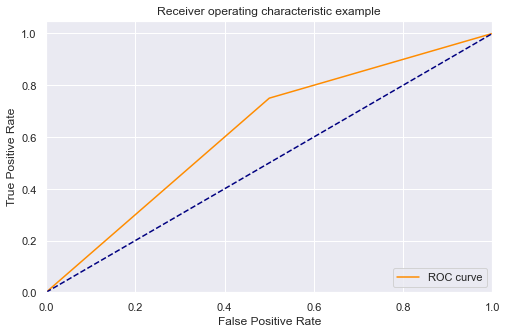

In [78]:
from sklearn.metrics import roc_curve
y_true = [1, 1, 1, 0, 1, 0]
y_pred_SVM2 = [1, 1, 0, 1, 1, 0]
fpr, tpr, thresholds = roc_curve(y_true, y_pred_SVM2)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC CURVE. Segons es desplaça la corba cap a la cantonada superior esquerra del gràfic, la qualitat del model va augmentant. Això és perquè millora en la seva taxa de veritables positius, minimitzant també la taxa de falsos positius.

### - Exercici 4
#### Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10)
print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross validation accuracy: 0.89 (+/- 0.11)


In [41]:
svm = SVC(gamma=0.001, C=100)
scores = cross_val_score(svm, X, y, cv=10)
print("Cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross validation accuracy: 0.95 (+/- 0.10)


El model SVM(0,95) és més precís que el model KNN(0,89) la desviació estàndard és petita (+/- 0.10), les puntuacions de precisió són fiables i es pot confiar en la precisió mitjana.

### - Exercici 5
#### Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Aplicarem un mostreig. El mostreig és una tècnica que consisteix en seleccionar un subconjunt representatiu de les dades d'entrada. Això es pot fer per millorar la velocitat del model o per reduir la complexitat.  

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [44]:
from sklearn import svm

In [58]:
clf3 = svm.SVC(gamma=0.001, C=100)
clf3.fit(X_train_resampled, y_train_resampled)
y_pred_SVM3 = clf3.predict(X_test)

In [63]:
acc_SVM3 = clf3.score(X_test, y_test)
acc_SVM3 = "{:.2f}".format(acc_SVM3)
F1_SVM3= f1_score(y_test, y_pred_SVM3, average="macro")
CMSVM3=confusion_matrix(y_test, y_pred_SVM3)
print(acc_SVM3)
print(F1_SVM3)
print(CMSVM3)

0.94
0.9432568783481562
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [64]:
metrics_SVM = {'Model': ['SVM', 'SVM2', "SVM3"],
           'Accuracy': [acc_SVM, acc_SVM2, acc_SVM3],"F1":[F1_SVM, F1_SVM2, F1_SVM3],
           'Confusion Matrix': [CMSVM, CMSVM2, CMSVM3]}

metrics_df4 = pd.DataFrame(metrics_SVM)
metrics_df4

,Model,Accuracy,F1,Confusion Matrix
0,SVM,0.94,0.952381,"[[13, 1, 0], [1, 13, 0], [0, 0, 8]]"
1,SVM2,0.97,0.968046,"[[14, 0, 0], [0, 13, 1], [0, 0, 8]]"
2,SVM3,0.94,0.943257,"[[14, 0, 0], [1, 12, 1], [0, 0, 8]]"


In [65]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto', random_state=0)
X_train_resampled1, y_train_resampled1 = rus.fit_resample(X_train, y_train)

In [66]:
clf4 = svm.SVC(gamma=0.001, C=100)
clf4.fit(X_train_resampled, y_train_resampled)
y_pred_SVM4 = clf4.predict(X_test)
acc_SVM4 = clf4.score(X_test, y_test)
acc_SVM4 = "{:.2f}".format(acc_SVM4)
F1_SVM4= f1_score(y_test, y_pred_SVM4, average="macro")
CMSVM4=confusion_matrix(y_test, y_pred_SVM4)

Metrics_SVM = {'Model': ['SVM', 'SVM2', "SVM3", "SVM4"],
           'Accuracy': [acc_SVM, acc_SVM2, acc_SVM3,acc_SVM4 ],"F1":[F1_SVM, F1_SVM2, F1_SVM3, F1_SVM4],
           'Confusion Matrix': [CMSVM, CMSVM2, CMSVM3, CMSVM4]}

metrics_df5 = pd.DataFrame(Metrics_SVM)
metrics_df5


,Model,Accuracy,F1,Confusion Matrix
0,SVM,0.94,0.952381,"[[13, 1, 0], [1, 13, 0], [0, 0, 8]]"
1,SVM2,0.97,0.968046,"[[14, 0, 0], [0, 13, 1], [0, 0, 8]]"
2,SVM3,0.94,0.943257,"[[14, 0, 0], [1, 12, 1], [0, 0, 8]]"
3,SVM4,0.94,0.943257,"[[14, 0, 0], [1, 12, 1], [0, 0, 8]]"


Fer un mostreig no ha millorat el rendiment del model. 